# **Linear Regression**

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("/content/drive/MyDrive/climate_change.csv")
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [3]:
df.shape

(308, 11)

In [4]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


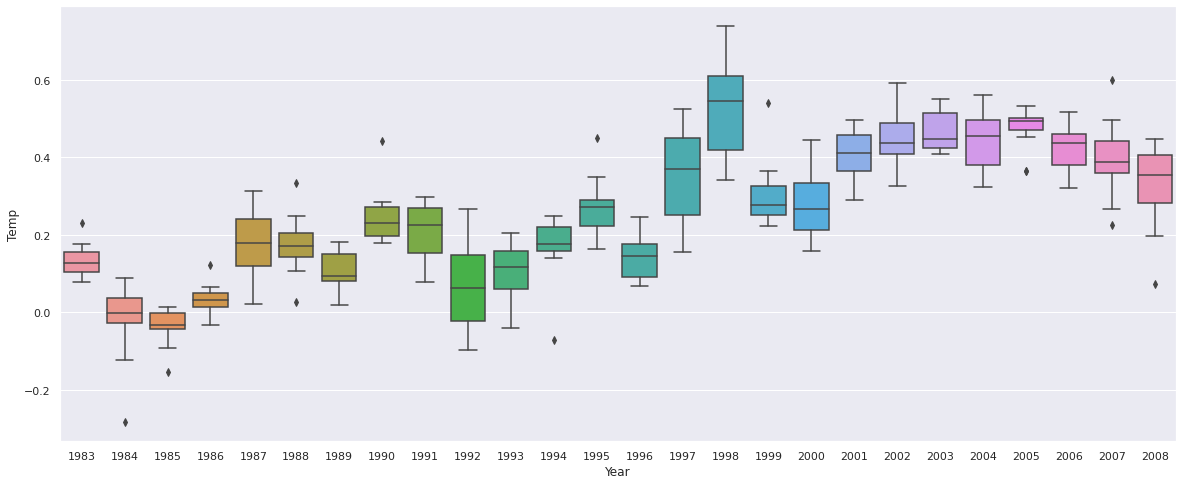

In [5]:
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x="Year", y="Temp", data=df)

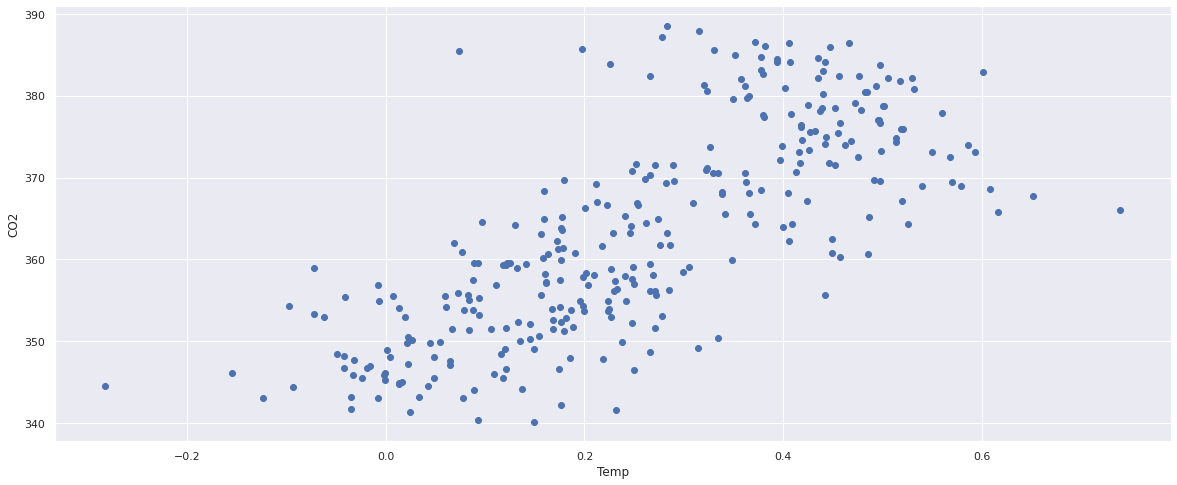

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df['Temp'], df['CO2'])
ax.set_xlabel('Temp')
ax.set_ylabel('CO2')
plt.show()

In [41]:
train, test = df[df['Year'] <= 2006], df[df['Year'] > 2006]

In [42]:
train

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
279,2006,8,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,2006,9,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,2006,10,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,2006,11,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440


In [43]:
test

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,2007,1,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,2007,2,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,2007,3,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,2007,4,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,2007,5,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372
289,2007,6,-0.358,386.05,1781.81,320.332,246.881,537.376,1365.7616,0.0040,0.382
290,2007,7,-0.290,384.49,1771.89,320.349,246.497,537.113,1365.7506,0.0040,0.394
291,2007,8,-0.440,382.00,1779.38,320.471,246.307,537.125,1365.7566,0.0041,0.358
292,2007,9,-1.162,380.90,1794.21,320.618,246.214,537.281,1365.7159,0.0042,0.402
293,2007,10,-1.142,381.14,1802.38,320.855,246.189,537.380,1365.7388,0.0041,0.362


In [44]:
X_train = train.drop(['Year', 'Month', 'Temp'], axis=1)
X_train

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
279,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041
280,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043
281,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049


In [45]:
Y_train = train['Temp']
Y_train

0      0.109
1      0.118
2      0.137
3      0.176
4      0.149
       ...  
279    0.482
280    0.425
281    0.472
282    0.440
283    0.518
Name: Temp, Length: 284, dtype: float64

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, Y_train)

LinearRegression()

In [48]:
model.coef_

array([ 6.42053134e-02,  6.45735927e-03,  1.24041896e-04, -1.65280033e-02,
       -6.63048889e-03,  3.80810324e-03,  9.31410835e-02, -1.53761324e+00])

In [49]:
X_test = test.drop(['Year', 'Month', 'Temp'], axis=1)

Y_test = test['Temp']

In [50]:
Y_pred = model.predict(X_test)

In [51]:
Y_pred

array([0.46860242, 0.44478187, 0.42780632, 0.43116826, 0.4460737 ,
       0.41399471, 0.40729574, 0.38220935, 0.32542604, 0.32818566,
       0.32404999, 0.33282136, 0.35396684, 0.33224687, 0.31387358,
       0.37012957, 0.41662876, 0.43901708, 0.42251851, 0.38953363,
       0.35864462, 0.34729998, 0.36256013, 0.36570405])

In [52]:
mean_squared_error(Y_test, Y_pred)

0.009097810529180444

In [53]:
r2_score(Y_test, Y_pred)

0.18377835333134962

In [55]:
model.score(X_train, Y_train)

0.7508932770523429

The model R2 (the "Multiple R-squared" value) = 0.7509

In [54]:
sm.OLS(Y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Temp   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              314.3
Date:                Sun, 01 May 2022   Prob (F-statistic):                   7.35e-134
Time:                        13:19:10   Log-Likelihood:                          261.15
No. Observations:                 284   AIC:                                     -506.3
Df Residuals:                     276   BIC:                                     -477.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0553      0.007      8.209      0.000       0.042       0.069
CO2            0.0062      0.002      2.560      0.011       0.001       0.011
CH4          7.06e-05      0.001      0.128      0.898      -0.001       0.001
N2O           -0.0132      0.009     -1.452      0.148      -0.031       0.005
CFC-11        -0.0058      0.002     -3.351      0.001      -0.009      -0.002
CFC-12         0.0036      0.001      3.311      0.001       0.001       0.006
TSI            0.0012      0.002      0.729      0.467      -0.002       0.005
Aerosols      -1.3314      0.225     -5.922      0.000      -1.774      -0.889
==============================================================================
Omnibus:                        5.432   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.298
Skew:                           0.265   Prob(JB):                       0.0707
Kurtosis:                       3.409   Cond. No.                     9.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MEI, CO2, CFC-11, CFC-12, TSI and Aerosols are the significant variables.

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


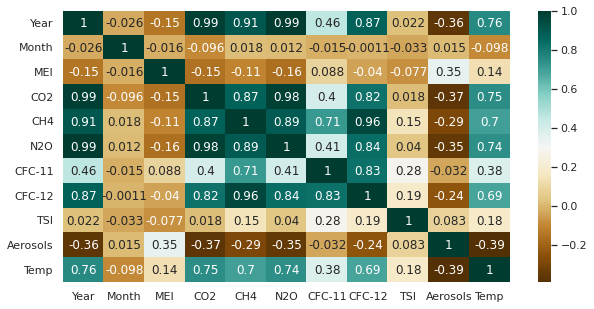

In [6]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In the correlation matrix, CO2 and Year have an almost perfect positive relationship, meaning that the CO2 level in the atmosphere increases every year. Similarly, Temperature has strong positive relationship with Year, CO2, CH4, N2O and CFC-12

All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.

N2O is highly correlated with CO2, CH4 and CFC-12

CFC-11 is highly correlated with CH4 and CFC-12

In [56]:
X_train = X_train = train.drop(['Year', 'Month', 'CO2', 'CH4', 'CFC-11', 'CFC-12', 'Temp'], axis=1)
X_train

,MEI,N2O,TSI,Aerosols
0,2.556,303.677,1366.1024,0.0863
1,2.167,303.746,1366.1208,0.0794
2,1.741,303.795,1366.2850,0.0731
3,1.130,303.839,1366.4202,0.0673
4,0.428,303.901,1366.2335,0.0619
...,...,...,...,...
279,0.759,319.930,1365.7067,0.0041
280,0.793,320.010,1365.8419,0.0043
281,0.892,320.125,1365.8270,0.0044
282,1.292,320.321,1365.7039,0.0049


In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, Y_train)

LinearRegression()

In [59]:
model.coef_

array([ 0.06418576,  0.02531975,  0.07949028, -1.70173707])

In [60]:
X_test = test.drop(['Year', 'Month', 'CO2', 'CH4', 'CFC-11', 'CFC-12', 'Temp'], axis=1)
X_test

,MEI,N2O,TSI,Aerosols
284,0.974,320.561,1365.7173,0.0054
285,0.510,320.571,1365.7145,0.0051
286,0.074,320.548,1365.7544,0.0045
287,-0.049,320.518,1365.7228,0.0045
288,0.183,320.445,1365.6932,0.0041
289,-0.358,320.332,1365.7616,0.0040
290,-0.290,320.349,1365.7506,0.0040
291,-0.440,320.471,1365.7566,0.0041
292,-1.162,320.618,1365.7159,0.0042
293,-1.142,320.855,1365.7388,0.0041


In [61]:
Y_pred = model.predict(X_test)

In [62]:
Y_pred

array([0.50424254, 0.47500149, 0.45062686, 0.43946052, 0.45083106,
       0.41885274, 0.42277342, 0.41654133, 0.37051579, 0.37979078,
       0.37698739, 0.38379337, 0.39889735, 0.37618515, 0.35521685,
       0.40470021, 0.44461922, 0.47276726, 0.46242522, 0.44429193,
       0.42265441, 0.4210011 , 0.43879308, 0.43941919])

In [63]:
mean_squared_error(Y_test, Y_pred)

0.012287362844027955

In [64]:
r2_score(Y_test, Y_pred)

-0.10237639062715775

In [65]:
model.score(X_train, Y_train)

0.726132127951111

The model R2 (the "Multiple R-squared" value) = 0.7261

In [66]:
sm.OLS(Y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Temp   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              587.8
Date:                Sun, 01 May 2022   Prob (F-statistic):                   7.66e-135
Time:                        14:04:14   Log-Likelihood:                          250.76
No. Observations:                 284   AIC:                                     -493.5
Df Residuals:                     280   BIC:                                     -478.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0564      0.007      8.200      0.000       0.043       0.070
N2O            0.0271      0.001     20.082      0.000       0.024       0.030
TSI           -0.0060      0.000    -19.417      0.000      -0.007      -0.005
Aerosols      -1.4671      0.226     -6.490      0.000      -1.912      -1.022
==============================================================================
Omnibus:                        7.635   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.703
Skew:                           0.269   Prob(JB):                       0.0129
Kurtosis:                       3.668   Cond. No.                     5.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion**



*   Linear Regression analysis allows us to understand the strength of relationships between variables as well as tells us what predictors in a model are statistically significant and which are not.

Answers:



*   Problem 1.1: The model R2 (the "Multiple R-squared" value) = 0.7509
*   Problem 1.2: Since MEI, CO2, CFC-11, CFC-12, TSI and Aerosols have p-value < 0.05, they are the significant variables.
*   Problem 2.1: (III) All of the gas concentration variables reflect human development - N2O and CFC-11 are correlated with other variables in the data set. N2O and CFC-11 have a strong positive relationship with many other variables in the dataset.
</br>
The independent variables which N2O is highly correlated with (absolute correlation greater than 0.7) are CO2, CH4 and CFC-12. The independent variables which CFC-11 is highly correlated with are CH4, CFC-12.
*   Problem 3: The simplified model R2 (the "Multiple R-squared" value) = 0.7261.
</br>
The regression coefficient of N2O is now positive in the simplified model. This implies that many of the independent variables are strongly correlated with each other.









